In [ ]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 594ms/step - accuracy: 0.0859 - loss: 4.2993 - val_accuracy: 0.2200 - val_loss: 2.1954
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 340ms/step - accuracy: 0.1753 - loss: 2.2130 - val_accuracy: 0.2100 - val_loss: 2.1572
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 374ms/step - accuracy: 0.1806 - loss: 2.1699 - val_accuracy: 0.2800 - val_loss: 2.0849
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 377ms/step - accuracy: 0.2183 - loss: 2.0902 - val_accuracy: 0.3050 - val_loss: 2.0161
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 347ms/step - accuracy: 0.2785 - loss: 1.9918 - val_accuracy: 0.3000 - val_loss: 1.9896
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.3882 - loss: 1.9296

✅ Test Accuracy: 0.3550
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


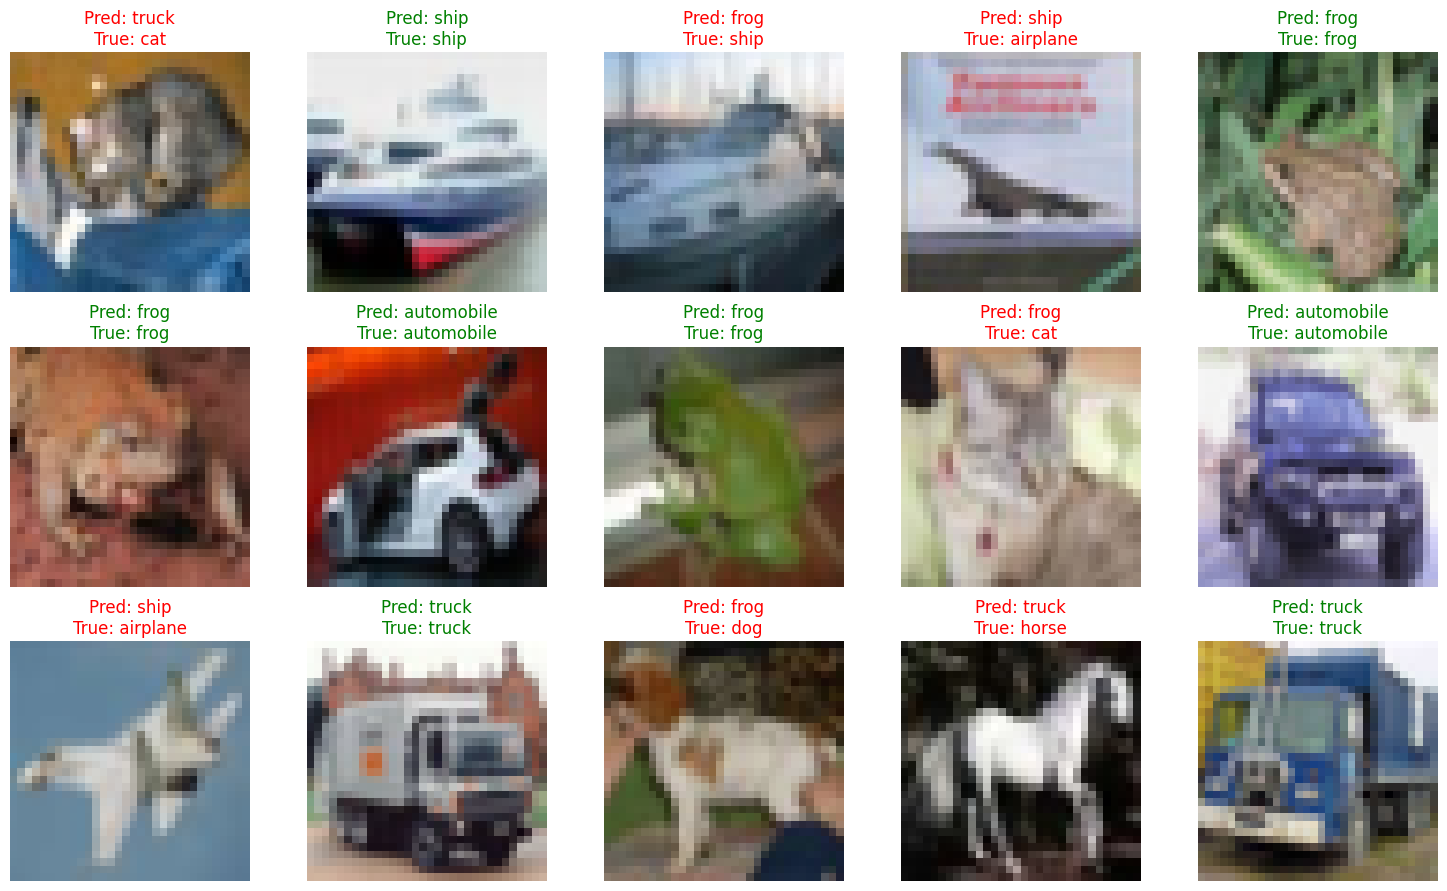

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Resizing
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and preprocess data (use subset to avoid memory crash)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# ✅ Use subset (optional, safer on low-RAM systems)
x_train = x_train[:1000]
y_train = y_train[:1000]
x_test = x_test[:200]
y_test = y_test[:200]

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 2. Load VGG16 model and add classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    Resizing(224, 224),
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 3. Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=64, validation_split=0.2)

# 4. Evaluate
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

# 5. Predict and visualize 15 images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

sample_images = x_test[:15]
sample_labels = y_test[:15]
predictions = model.predict(sample_images)

plt.figure(figsize=(15, 9))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i])
    pred_label = np.argmax(predictions[i])
    true_label = sample_labels[i][0]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()
